In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Предобработка**

In [175]:
df = pd.read_csv('restaurants.csv', index_col=0)
df.head()

,name,rating,price_range,price_range_numeric,is_sponsored,latitude,longitude,has_delivery,is_premium,reviews,...,Dog Friendly,Options for PWD,Has Diff Payment Options,Family,Good Location,Gift Cards,Alcohol,Reservations,Has Diff Dining Services,Entertainment
0,Leicester Arms,4.5,$$ - $$$,2.5,1,51.510597,-0.137677,0,0,602,...,0,0,1,1,0,0,1,1,1,1
1,Swiss Butter,4.0,$$ - $$$,2.5,1,51.520620,-0.122808,0,1,182,...,0,1,1,0,0,0,1,0,1,0
2,Florattica Rooftop Bar London,4.5,$$ - $$$,2.5,0,51.512955,-0.075292,0,1,316,...,0,0,1,0,0,0,1,1,1,0
3,The Black Dog Freehouse,4.5,$$ - $$$,2.5,0,51.488724,-0.120889,0,0,733,...,0,1,1,0,0,0,1,1,1,0
4,Fitz's Brasserie,5.0,$$ - $$$,2.5,0,51.522408,-0.124933,0,0,48,...,1,1,0,0,0,0,1,1,1,0


In [176]:
cuisines_cols = ['Italian', 'American',
              'Chinese', 'Healthy', 'Seafood', 'Middle Eastern', 'International',
              'Indian', 'Central Asian', 'Bar', 'European', 'Pizza', 'Asian', 'Latin',
              'Japanese', 'Cafe', 'British', 'French', 'Fast Food', 'African']

# Итерируемся по столбцам и подсчитываем количество единиц
for column in cuisines_cols:
    counts = df[column].value_counts()
    if 1 in counts:
        print(f"Количество единиц в столбце '{column}': {counts[1]}")
    else:
        print(f"В столбце '{column}' нет единиц")

Количество единиц в столбце 'Italian': 1270
Количество единиц в столбце 'American': 588
Количество единиц в столбце 'Chinese': 382
Количество единиц в столбце 'Healthy': 494
Количество единиц в столбце 'Seafood': 1981
Количество единиц в столбце 'Middle Eastern': 747
Количество единиц в столбце 'International': 888
Количество единиц в столбце 'Indian': 691
Количество единиц в столбце 'Central Asian': 79
Количество единиц в столбце 'Bar': 2302
Количество единиц в столбце 'European': 2035
Количество единиц в столбце 'Pizza': 754
Количество единиц в столбце 'Asian': 1778
Количество единиц в столбце 'Latin': 362
Количество единиц в столбце 'Japanese': 504
Количество единиц в столбце 'Cafe': 991
Количество единиц в столбце 'British': 2715
Количество единиц в столбце 'French': 331
Количество единиц в столбце 'Fast Food': 676
Количество единиц в столбце 'African': 121


In [177]:
# Шаг 1: Определяем столбцы для объединения
cols_to_combine = []
for column in cuisines_cols:
    counts = df[column].value_counts()
    if 1 in counts and counts[1] <= 500:
        cols_to_combine.append(column)

# Шаг 2: Создаем столбец "Other"
df['Other cuisines'] = 0  # Инициализируем нулями
# Если в любом из выбранных столбцов есть 1, устанавливаем 1 в 'Other'
if cols_to_combine:
    df['Other cuisines'] = df[cols_to_combine].max(axis=1)

# Шаг 3: Удаляем объединенные столбцы
df.drop(columns=cols_to_combine, inplace=True)

In [178]:
df.columns

Index(['name', 'rating', 'price_range', 'price_range_numeric', 'is_sponsored',
       'latitude', 'longitude', 'has_delivery', 'is_premium', 'reviews',
       'reviews_rating_1', 'reviews_rating_2', 'reviews_rating_3',
       'reviews_rating_4', 'reviews_rating_5', 'IsIn_MICHELIN_Guide',
       'is close to sightseeng', 'num_cuisines', 'Italian', 'American',
       'Seafood', 'Middle Eastern', 'International', 'Indian', 'Bar',
       'European', 'Pizza', 'Asian', 'Japanese', 'Cafe', 'British',
       'Fast Food', 'Vegan', 'Halal/Kosher', 'Gluten-free',
       'Vegetarian friendly', 'The menu does not match the diets', 'Parking',
       'Free Wifi', 'Dog Friendly', 'Options for PWD',
       ' Has Diff Payment Options', 'Family', 'Good Location', 'Gift Cards',
       'Alcohol', 'Reservations', 'Has Diff Dining Services', 'Entertainment',
       'Other cuisines'],
      dtype='object')

In [179]:
diets_cols = ['Vegan', 'Halal/Kosher', 'Gluten-free', 'Vegetarian friendly',
              'The menu does not match the diets']

# Итерируемся по столбцам и подсчитываем количество единиц
for column in diets_cols:
    counts = df[column].value_counts()
    if 1 in counts:
        print(f"Количество единиц в столбце '{column}': {counts[1]}")
    else:
        print(f"В столбце '{column}' нет единиц")

Количество единиц в столбце 'Vegan': 4175
Количество единиц в столбце 'Halal/Kosher': 676
Количество единиц в столбце 'Gluten-free': 3362
Количество единиц в столбце 'Vegetarian friendly': 6397
Количество единиц в столбце 'The menu does not match the diets': 2192


In [180]:
options_cols = ['Parking', 'Free Wifi',
              'Dog Friendly', 'Options for PWD', ' Has Diff Payment Options',
              'Family', 'Good Location', 'Gift Cards', 'Alcohol', 'Reservations',
              'Has Diff Dining Services', 'Entertainment']

# Итерируемся по столбцам и подсчитываем количество единиц
for column in options_cols:
    counts = df[column].value_counts()
    if 1 in counts:
        print(f"Количество единиц в столбце '{column}': {counts[1]}")
    else:
        print(f"В столбце '{column}' нет единиц")

Количество единиц в столбце 'Parking': 1130
Количество единиц в столбце 'Free Wifi': 3721
Количество единиц в столбце 'Dog Friendly': 669
Количество единиц в столбце 'Options for PWD': 5095
Количество единиц в столбце ' Has Diff Payment Options': 5028
Количество единиц в столбце 'Family': 1090
Количество единиц в столбце 'Good Location': 48
Количество единиц в столбце 'Gift Cards': 948
Количество единиц в столбце 'Alcohol': 6899
Количество единиц в столбце 'Reservations': 7112
Количество единиц в столбце 'Has Diff Dining Services': 8784
Количество единиц в столбце 'Entertainment': 1293


In [181]:
# Шаг 1: Определяем столбцы для объединения
cols_to_combine_2 = []
for column in options_cols:
    counts = df[column].value_counts()
    if 1 in counts and counts[1] <= 1500:
        cols_to_combine_2.append(column)

# Шаг 2: Создаем столбец "Other"
df['Other options'] = 0  # Инициализируем нулями
# Если в любом из выбранных столбцов есть 1, устанавливаем 1 в 'Other'
if cols_to_combine_2:
    df['Other options'] = df[cols_to_combine_2].max(axis=1)

# Шаг 3: Удаляем объединенные столбцы
df.drop(columns=cols_to_combine_2, inplace=True)

In [182]:
df.columns

Index(['name', 'rating', 'price_range', 'price_range_numeric', 'is_sponsored',
       'latitude', 'longitude', 'has_delivery', 'is_premium', 'reviews',
       'reviews_rating_1', 'reviews_rating_2', 'reviews_rating_3',
       'reviews_rating_4', 'reviews_rating_5', 'IsIn_MICHELIN_Guide',
       'is close to sightseeng', 'num_cuisines', 'Italian', 'American',
       'Seafood', 'Middle Eastern', 'International', 'Indian', 'Bar',
       'European', 'Pizza', 'Asian', 'Japanese', 'Cafe', 'British',
       'Fast Food', 'Vegan', 'Halal/Kosher', 'Gluten-free',
       'Vegetarian friendly', 'The menu does not match the diets', 'Free Wifi',
       'Options for PWD', ' Has Diff Payment Options', 'Alcohol',
       'Reservations', 'Has Diff Dining Services', 'Other cuisines',
       'Other options'],
      dtype='object')

In [183]:
df

,name,rating,price_range,price_range_numeric,is_sponsored,latitude,longitude,has_delivery,is_premium,reviews,...,Vegetarian friendly,The menu does not match the diets,Free Wifi,Options for PWD,Has Diff Payment Options,Alcohol,Reservations,Has Diff Dining Services,Other cuisines,Other options
0,Leicester Arms,4.5,$$ - $$$,2.5,1,51.510597,-0.137677,0,0,602,...,1,0,1,0,1,1,1,1,0,1
1,Swiss Butter,4.0,$$ - $$$,2.5,1,51.520620,-0.122808,0,1,182,...,0,1,0,1,1,1,0,1,1,0
2,Florattica Rooftop Bar London,4.5,$$ - $$$,2.5,0,51.512955,-0.075292,0,1,316,...,0,1,1,0,1,1,1,1,1,0
3,The Black Dog Freehouse,4.5,$$ - $$$,2.5,0,51.488724,-0.120889,0,0,733,...,1,0,1,1,1,1,1,1,0,0
4,Fitz's Brasserie,5.0,$$ - $$$,2.5,0,51.522408,-0.124933,0,0,48,...,1,0,0,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8941,Sushi Kyu,4.6,£££,3.0,0,51.512120,-0.134599,1,1,44,...,0,1,0,0,0,1,0,1,0,1
8942,Gallery,4.7,££££,4.0,0,51.601208,-0.243339,0,0,8192,...,0,0,0,1,0,1,0,1,1,1
8943,Mister Nice,4.0,££££,4.0,0,51.511200,-0.147390,0,0,17,...,0,1,0,0,0,1,0,0,1,0
8944,Capilungo,4.6,££,2.0,0,51.514233,-0.122250,0,0,15,...,0,1,0,0,0,1,0,1,0,1


Посмотрим на распределение `rating`

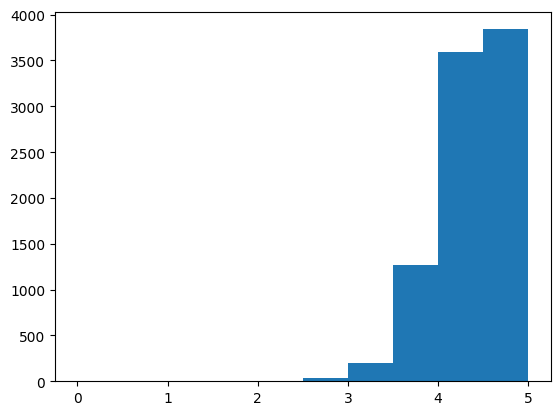

In [184]:
plt.hist(df['rating'])
plt.show()

Большинство оценок находится между 4 и 5, поэтому будем считать рестораны с рейтингом >=4.0 "хорошими", а остальные "не такими хорошими". Разметим наши данные:

In [185]:
df['rating'].unique()

array([4.5, 4. , 5. , 3.5, 3. , 2.5, 2. , 1.5, 0. , 4.1, 1. , 4.6, 3.7,
       4.4, 3.9, 3.2, 4.7, 4.2, 4.3, 3.8, 4.8])

In [186]:
def make_label(r):
    if r < 4.0:
        return 0  # not so good
    else:
        return 1  # good

df['label'] = df['rating'].apply(make_label)
df

,name,rating,price_range,price_range_numeric,is_sponsored,latitude,longitude,has_delivery,is_premium,reviews,...,The menu does not match the diets,Free Wifi,Options for PWD,Has Diff Payment Options,Alcohol,Reservations,Has Diff Dining Services,Other cuisines,Other options,label
0,Leicester Arms,4.5,$$ - $$$,2.5,1,51.510597,-0.137677,0,0,602,...,0,1,0,1,1,1,1,0,1,1
1,Swiss Butter,4.0,$$ - $$$,2.5,1,51.520620,-0.122808,0,1,182,...,1,0,1,1,1,0,1,1,0,1
2,Florattica Rooftop Bar London,4.5,$$ - $$$,2.5,0,51.512955,-0.075292,0,1,316,...,1,1,0,1,1,1,1,1,0,1
3,The Black Dog Freehouse,4.5,$$ - $$$,2.5,0,51.488724,-0.120889,0,0,733,...,0,1,1,1,1,1,1,0,0,1
4,Fitz's Brasserie,5.0,$$ - $$$,2.5,0,51.522408,-0.124933,0,0,48,...,0,0,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8941,Sushi Kyu,4.6,£££,3.0,0,51.512120,-0.134599,1,1,44,...,1,0,0,0,1,0,1,0,1,1
8942,Gallery,4.7,££££,4.0,0,51.601208,-0.243339,0,0,8192,...,0,0,1,0,1,0,1,1,1,1
8943,Mister Nice,4.0,££££,4.0,0,51.511200,-0.147390,0,0,17,...,1,0,0,0,1,0,0,1,0,1
8944,Capilungo,4.6,££,2.0,0,51.514233,-0.122250,0,0,15,...,1,0,0,0,1,0,1,0,1,1


In [187]:
df.to_csv('restaurants_new.csv', index=False)

# **Обучение моделей**

In [188]:
df = pd.read_csv('restaurants_new.csv')
df

,name,rating,price_range,price_range_numeric,is_sponsored,latitude,longitude,has_delivery,is_premium,reviews,...,The menu does not match the diets,Free Wifi,Options for PWD,Has Diff Payment Options,Alcohol,Reservations,Has Diff Dining Services,Other cuisines,Other options,label
0,Leicester Arms,4.5,$$ - $$$,2.5,1,51.510597,-0.137677,0,0,602,...,0,1,0,1,1,1,1,0,1,1
1,Swiss Butter,4.0,$$ - $$$,2.5,1,51.520620,-0.122808,0,1,182,...,1,0,1,1,1,0,1,1,0,1
2,Florattica Rooftop Bar London,4.5,$$ - $$$,2.5,0,51.512955,-0.075292,0,1,316,...,1,1,0,1,1,1,1,1,0,1
3,The Black Dog Freehouse,4.5,$$ - $$$,2.5,0,51.488724,-0.120889,0,0,733,...,0,1,1,1,1,1,1,0,0,1
4,Fitz's Brasserie,5.0,$$ - $$$,2.5,0,51.522408,-0.124933,0,0,48,...,0,0,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8941,Sushi Kyu,4.6,£££,3.0,0,51.512120,-0.134599,1,1,44,...,1,0,0,0,1,0,1,0,1,1
8942,Gallery,4.7,££££,4.0,0,51.601208,-0.243339,0,0,8192,...,0,0,1,0,1,0,1,1,1,1
8943,Mister Nice,4.0,££££,4.0,0,51.511200,-0.147390,0,0,17,...,1,0,0,0,1,0,0,1,0,1
8944,Capilungo,4.6,££,2.0,0,51.514233,-0.122250,0,0,15,...,1,0,0,0,1,0,1,0,1,1


**Задача (упрощенно):** определить, ресторан "хороший" или "не такой хороший" *(бинарная классификация)*

Удалим колонки, из которых может следовать прямой ответ на нашу задачу

In [189]:
df = df.drop(columns=['name', 'rating', 'price_range', 'reviews_rating_1',
                     'reviews_rating_2', 'reviews_rating_3', 'reviews_rating_4',
                     'reviews_rating_5'], axis=1)

In [190]:
# Списки признаков, чтобы применять Scaler только к числовым колонкам
numeric_features = ['price_range_numeric', 'latitude', 'longitude', 'reviews',
                    'num_cuisines']
onehot_features = ['is_sponsored', 'has_delivery', 'is_premium',
                   'IsIn_MICHELIN_Guide', 'is close to sightseeng', 'Italian',
                   'American', 'Seafood', 'Middle Eastern', 'International',
                   'Indian', 'Bar', 'European', 'Pizza', 'Asian', 'Japanese',
                   'Cafe', 'British', 'Fast Food', 'Vegan', 'Halal/Kosher',
                   'Gluten-free', 'Vegetarian friendly',
                   'The menu does not match the diets', 'Free Wifi',
                   'Options for PWD', ' Has Diff Payment Options', 'Alcohol',
                   'Reservations', 'Has Diff Dining Services',
                   'Other cuisines', 'Other options']

**Разделение на train и test**

In [191]:
# stratify=y в функции train_test_split означает, что при разделении данных
# пропорции классов в исходных данных сохранятся в обеих выборках

In [192]:
from sklearn.model_selection import train_test_split
# Разбиение:
X = df[numeric_features + onehot_features]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42, stratify=y
)

**Трансформеры**

In [193]:
# StandardScaler нужен для стандартизации данных, преобразует признаки так,
# чтобы их среднее значение было 0, а стандартное отклонение 1

In [194]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
# Предобработчик:
# Масштабирование числовых признаков и выбор k наиболее значимых из OHE
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('onehot_feats', SelectKBest(score_func=chi2, k=25), onehot_features)
], remainder='drop')

**Кросс-валидация**

In [195]:
from sklearn.model_selection import StratifiedKFold
# Параметры кросс-валидации: 5 фолдов с перемешиванием
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [196]:
from sklearn.pipeline import Pipeline

## **LogisticRegression** (логистическая регрессия)

LogisticRegression best params: {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.27      0.71      0.39       304
           1       0.91      0.61      0.73      1486

    accuracy                           0.63      1790
   macro avg       0.59      0.66      0.56      1790
weighted avg       0.80      0.63      0.67      1790

[[215  89]
 [581 905]]


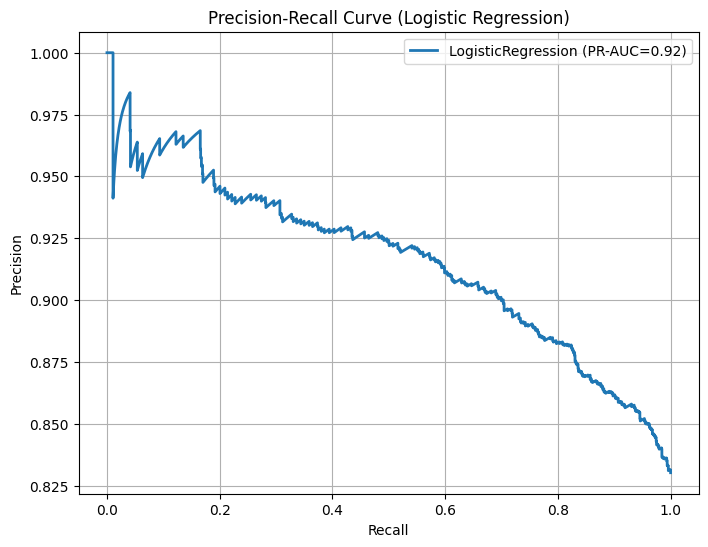

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV #для подбора гиперпараметров
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

# 1) Pipeline
pipeline_lr = Pipeline([
    ('preproc', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'))
])

# 2) Гиперпараметры
param_grid_lr = {
    'clf__C': [0.01, 0.1, 1, 10], # сила регуляризации (меньше C сильнее регуляризация)
    'clf__penalty': ['l2'], # тип регуляризации (L2 — Ridge)
    'clf__class_weight': ['balanced'] # балансировка классов
}

# 3) GridSearchCV
grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=cv, scoring='average_precision', n_jobs=-1)
grid_lr.fit(X_train, y_train)
print("LogisticRegression best params:", grid_lr.best_params_)

# 4) Оценка на тесте
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

# 5) PR-кривая
y_score_lr = best_lr.predict_proba(X_test)[:, 1] # вероятности класса 1
precision, recall, _ = precision_recall_curve(y_test, y_score_lr)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, label=f"LogisticRegression (PR-AUC={pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Logistic Regression)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

confusion_matrix

[ [ TN  FP ]  
  [ FN  TP ] ]  

TN (True Negative) — правильно предсказанные "0".

FP (False Positive) — "0", ошибочно предсказанные как "1".

FN (False Negative) — "1", ошибочно предсказанные как "0".

TP (True Positive) — правильно предсказанные "1".

## **DecisionTree** (дерево решений)

DecisionTree best params: {'clf__max_depth': 6, 'clf__min_samples_leaf': 5}
              precision    recall  f1-score   support

           0       0.25      0.68      0.36       304
           1       0.90      0.57      0.70      1486

    accuracy                           0.59      1790
   macro avg       0.57      0.63      0.53      1790
weighted avg       0.79      0.59      0.64      1790

[[208  96]
 [635 851]]


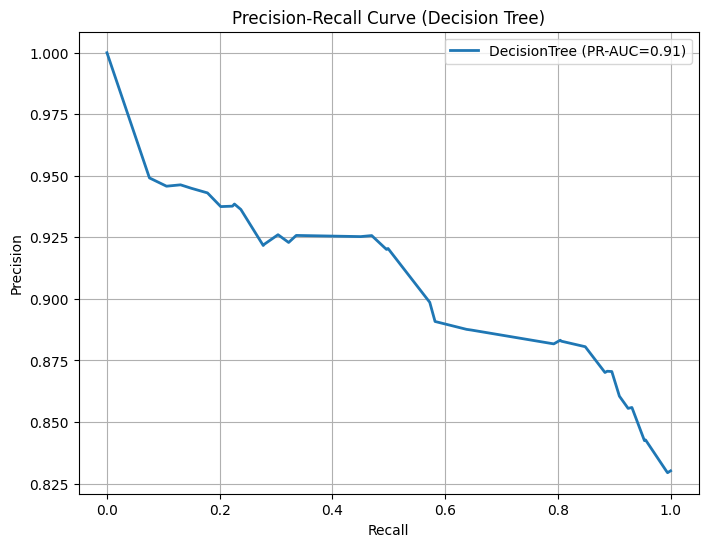

In [199]:
from sklearn.tree import DecisionTreeClassifier

# 1) Pipeline
pipeline_dt = Pipeline([
    ('preproc', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

# 2) Сетка гиперпараметров
param_grid_dt = {
    'clf__max_depth': [None, 5, 6, 7, 8, 9, 10, 20], # максимальная глубина дерева
    'clf__min_samples_leaf': [1, 5, 6, 10] # минимальное число объектов в листе
}

# 3) GridSearchCV
grid_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=cv, scoring='average_precision', n_jobs=-1)
grid_dt.fit(X_train, y_train)
print("DecisionTree best params:", grid_dt.best_params_)

# 4) Оценка на тесте
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

# 5) PR-кривая
y_score_dt = best_dt.predict_proba(X_test)[:, 1] # вероятности класса 1
precision, recall, _ = precision_recall_curve(y_test, y_score_dt)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, label=f"DecisionTree (PR-AUC={pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Decision Tree)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## **RandomForest** (cлучайный лес)

RandomForest best params: {'clf__class_weight': 'balanced', 'clf__max_depth': None, 'clf__min_samples_leaf': 10, 'clf__n_estimators': 75}
              precision    recall  f1-score   support

           0       0.38      0.52      0.44       304
           1       0.89      0.83      0.86      1486

    accuracy                           0.77      1790
   macro avg       0.64      0.67      0.65      1790
weighted avg       0.81      0.77      0.79      1790

[[ 157  147]
 [ 259 1227]]


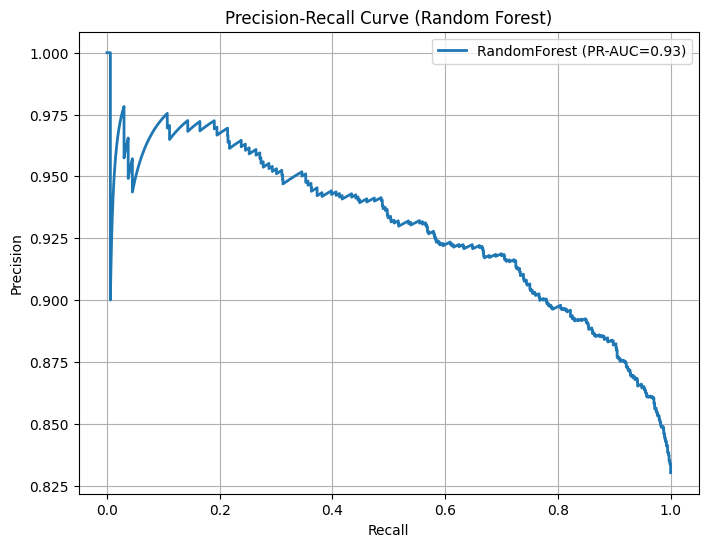

In [200]:
from sklearn.ensemble import RandomForestClassifier

# 1) Pipeline
pipeline_rf = Pipeline([
    ('preproc', preprocessor),
    ('clf', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# 2) Сетка гиперпараметров
param_grid_rf = {
    'clf__n_estimators': [25, 50, 75, 100, 125, 150, 175, 200], # количество деревьев
    'clf__max_depth': [None, 5, 6, 7, 8, 9, 10, 20], # максимальная глубина деревьев
    'clf__min_samples_leaf': [1, 5, 10], # минимальное число объектов в листе
    'clf__class_weight': ['balanced'] # балансировка классов
}

# 3) GridSearchCV
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=cv, scoring='average_precision', n_jobs=-1)
grid_rf.fit(X_train, y_train)
print("RandomForest best params:", grid_rf.best_params_)

# 4) Оценка на тесте
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# 5) PR-кривая
y_score_rf = best_rf.predict_proba(X_test)[:, 1] # вероятности класса 1
precision, recall, _ = precision_recall_curve(y_test, y_score_rf)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, label=f"RandomForest (PR-AUC={pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Random Forest)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## **XGBoost** (градиентный бустинг на деревьях)

In [201]:
pip install xgboost # установка библиотеки XGBoost (eXtreme Gradient Boosting)

XGBoost best params: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'clf__subsample': 0.8}
              precision    recall  f1-score   support

           0       0.65      0.12      0.20       304
           1       0.85      0.99      0.91      1486

    accuracy                           0.84      1790
   macro avg       0.75      0.55      0.55      1790
weighted avg       0.81      0.84      0.79      1790

[[  35  269]
 [  19 1467]]


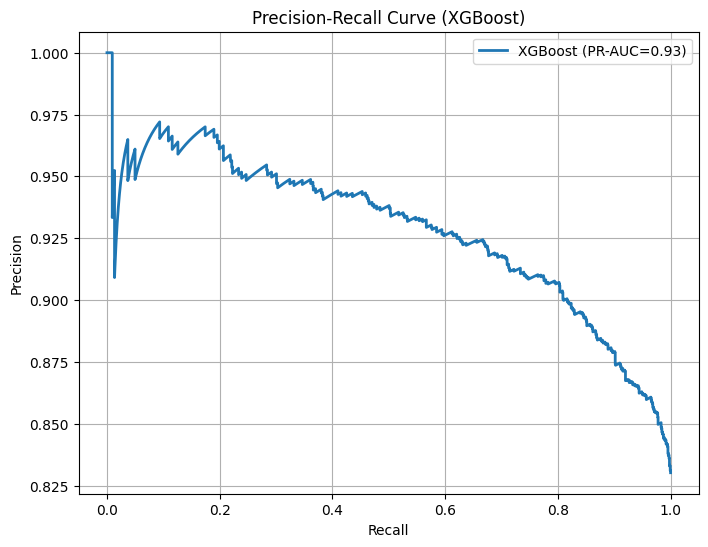

In [202]:
from xgboost import XGBClassifier

# 1) Pipeline
pipeline_xgb = Pipeline([
    ('preproc', preprocessor),
    ('clf', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', verbosity=0))
])

# 2) Сетка гиперпараметров
param_grid_xgb = {
    'clf__n_estimators': [25, 50, 75, 100, 200], # количество деревьев
    'clf__max_depth': [3, 6, 10], # максимальная глубина деревьев
    'clf__learning_rate': [0.01, 0.1], # скорость обучения (насколько сильно каждое новое дерево корректирует ошибки предыдущих)
    'clf__subsample': [0.8, 1.0] # доля данных для обучения (какая часть данных используется для построения каждого дерева)
}

# 3) GridSearchCV
grid_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=cv, scoring='average_precision', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
print("XGBoost best params:", grid_xgb.best_params_)

# 4) Оценка на тесте
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

# 5) PR-кривая
y_score_xgb = best_xgb.predict_proba(X_test)[:, 1] # вероятности класса 1
precision, recall, _ = precision_recall_curve(y_test, y_score_xgb)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, label=f"XGBoost (PR-AUC={pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (XGBoost)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## **LightGBM** (градиентный бустинг на деревьях)

In [203]:
pip install lightgbm # установка библиотеки LightGBM (Light Gradient Boosting Machine)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5943, number of negative: 1213
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 7156, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
LightGBM best params: {'clf__class_weight': 'balanced', 'clf__learning_rate': 0.1, 'clf__max_depth': 10, 'clf__n_estimators': 100, 'clf__num_leaves': 31}
              precision    recall  f1-score   support

           0       0.36      0.63      0.46       304
           1       0.91      0.77      0.84      1486

    accuracy                           0.75      1790
   macro avg       0.64      0.70      0.65      1790
weighted avg       0

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


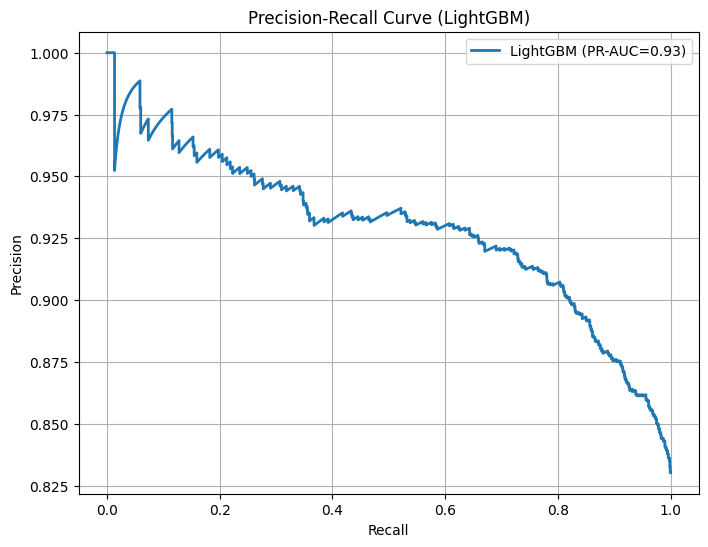

In [204]:
from lightgbm import LGBMClassifier

# 1) Pipeline
pipeline_lgb = Pipeline([
    ('preproc', preprocessor),
    ('clf', LGBMClassifier(random_state=42))
])

# 2) Сетка гиперпараметров
param_grid_lgb = {
    'clf__n_estimators': [100, 200], # количество деревьев
    'clf__max_depth': [-1, 10, 20], # максимальная глубина деревьев
    'clf__learning_rate': [0.01, 0.1], # скорость обучения (насколько сильно каждое новое дерево корректирует ошибки предыдущих)
    'clf__num_leaves': [31, 50, 100], # количество листьев в дереве
    'clf__class_weight': ['balanced'] # балансировка классов
}

# 3) GridSearchCV
grid_lgb = GridSearchCV(pipeline_lgb, param_grid_lgb, cv=cv, scoring='average_precision', n_jobs=-1)
grid_lgb.fit(X_train, y_train)
print("LightGBM best params:", grid_lgb.best_params_)

# 4) Оценка на тесте
best_lgb = grid_lgb.best_estimator_
y_pred_lgb = best_lgb.predict(X_test)
print(classification_report(y_test, y_pred_lgb))
print(confusion_matrix(y_test, y_pred_lgb))

# 5) PR-кривая
y_score_lgb = best_lgb.predict_proba(X_test)[:, 1] # вероятности класса 1
precision, recall, _ = precision_recall_curve(y_test, y_score_lgb)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, label=f"LightGBM (PR-AUC={pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (LightGBM)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## **SVC** (метод опорных векторов)

SVC best params: {'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.30      0.70      0.42       304
           1       0.91      0.66      0.77      1486

    accuracy                           0.67      1790
   macro avg       0.61      0.68      0.59      1790
weighted avg       0.81      0.67      0.71      1790

[[212  92]
 [504 982]]


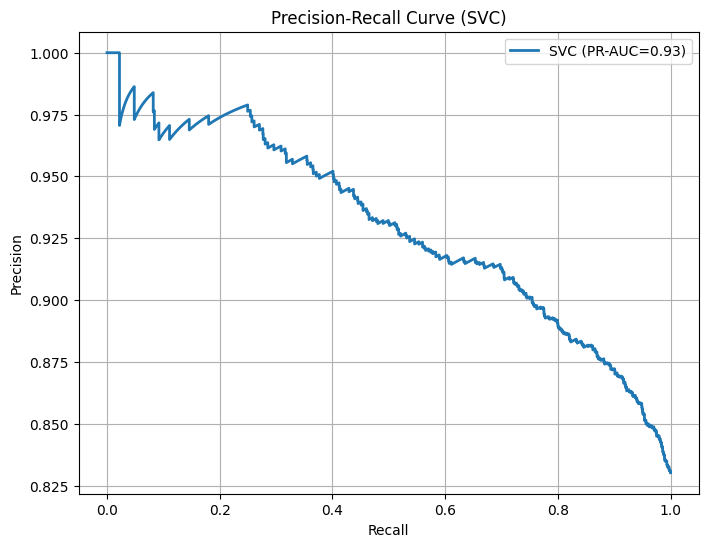

In [205]:
from sklearn.svm import SVC

# 1) Pipeline
pipeline_svc = Pipeline([
    ('preproc', preprocessor),
    ('clf', SVC(random_state=42, probability=True, class_weight='balanced')) # probability=True: позволяет модели возвращать вероятности принадлежности к классам
])

# 2) Сетка гиперпараметров
param_grid_svc = {
    'clf__C': [0.1, 1, 10], # параметр регуляризации
    'clf__kernel': ['linear', 'rbf'], # тип ядра SVM (линейное ядро и радиальная базисная функция)
    'clf__gamma': ['scale', 'auto'] # gamma определяет, насколько сильно влияют отдельные точки данных на форму границы решений
}

# 3) GridSearchCV
grid_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=cv, scoring='average_precision', n_jobs=-1)
grid_svc.fit(X_train, y_train)
print("SVC best params:", grid_svc.best_params_)

# 4) Оценка на тесте
best_svc = grid_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

# 5) PR-кривая
y_score_svc = best_svc.predict_proba(X_test)[:, 1] # вероятности класса 1
precision, recall, _ = precision_recall_curve(y_test, y_score_svc)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, label=f"SVC (PR-AUC={pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (SVC)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## **RandomForest v2** (случайный лес v2)

In [206]:
clf_1 = RandomForestClassifier(n_estimators=115, max_features=15, random_state=42)

In [207]:
clf_1.fit(X_train, y_train)

RandomForestClassifier(max_features=15, n_estimators=115, random_state=42)

              precision    recall  f1-score   support

           0       0.59      0.14      0.23       304
           1       0.85      0.98      0.91      1486

    accuracy                           0.84      1790
   macro avg       0.72      0.56      0.57      1790
weighted avg       0.80      0.84      0.79      1790

[[  43  261]
 [  30 1456]]


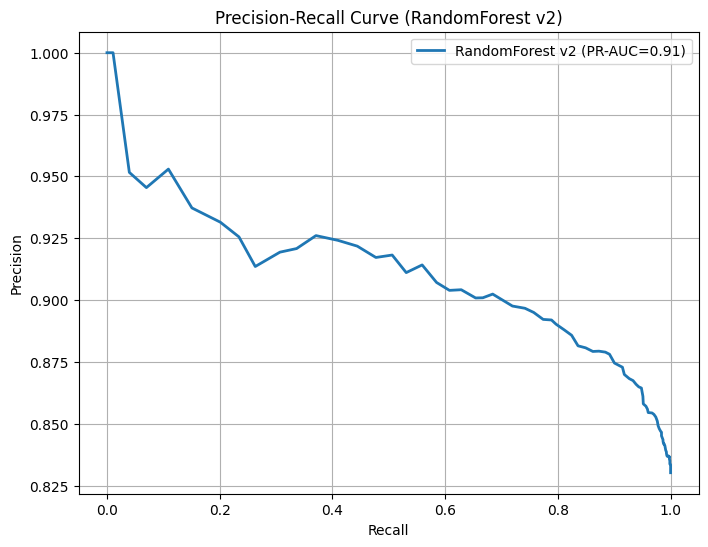

In [208]:
y_pred_rf2 = clf_1.predict(X_test)
print(classification_report(y_test, y_pred_rf2))
print(confusion_matrix(y_test, y_pred_rf2))

y_score_rf2 = clf_1.predict_proba(X_test)[:, 1] # вероятности класса 1
precision, recall, _ = precision_recall_curve(y_test, y_score_rf2)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, label=f"RandomForest v2 (PR-AUC={pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (RandomForest v2)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## **MLP** (нейронная сеть)

MLPClassifier best params: {'clf__activation': 'relu', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (200,), 'clf__learning_rate_init': 0.001, 'clf__solver': 'adam'}
              precision    recall  f1-score   support

           0       0.63      0.16      0.26       304
           1       0.85      0.98      0.91      1486

    accuracy                           0.84      1790
   macro avg       0.74      0.57      0.59      1790
weighted avg       0.81      0.84      0.80      1790

[[  50  254]
 [  29 1457]]


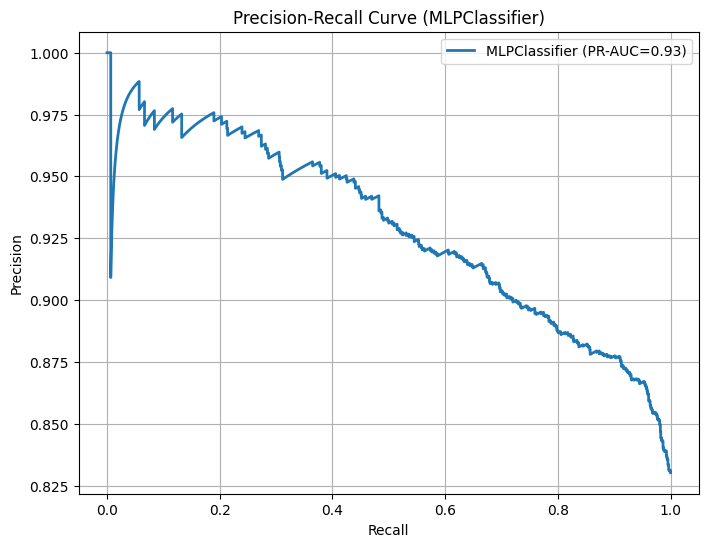

In [209]:
from sklearn.neural_network import MLPClassifier

# 1) Pipeline

# max_iter=2000: максимальное количество итераций (эпох) для обучения модели
# это означает, что модель будет обучаться до 2000 раз, если не будет достигнута сходимость раньше

# early_stopping=True: обучение модели будет остановлено раньше,
# если на валидационном наборе данных не будет улучшения. Это помогает избежать переобучения

# validation_fraction=0.1: доля обучающих данных, которая будет использоваться
# для валидации при ранней остановке

pipeline_mlp = Pipeline([
    ('preproc', preprocessor),
    ('clf', MLPClassifier(random_state=42, max_iter=2000, early_stopping=True, validation_fraction=0.1))
])

# 2) Сетка гиперпараметров
param_grid_mlp = {
    'clf__hidden_layer_sizes': [(150,), (200,), (250,), (100,100)], # количество нейронов в каждом скрытом слое
    'clf__alpha': [0.0001, 0.001], # параметр регуляризации L2
    'clf__learning_rate_init': [0.001, 0.01], # начальная скорость обучения, определяет размер шага при обновлении весов модели
    'clf__activation': ['relu', 'tanh'], # функция активации для скрытых слоев нейронной сети, определяет, как выход одного слоя передается на вход следующего слоя
    'clf__solver': ['adam'] # алгоритм оптимизации, который используется для обучения модели; определяет, как модель обновляет свои веса во время обучения
}

# 3) GridSearchCV
grid_mlp = GridSearchCV(pipeline_mlp, param_grid_mlp, cv=cv, scoring='average_precision', n_jobs=-1)
grid_mlp.fit(X_train, y_train)
print("MLPClassifier best params:", grid_mlp.best_params_)

# 4) Оценка на тесте
best_mlp = grid_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test)
print(classification_report(y_test, y_pred_mlp))
print(confusion_matrix(y_test, y_pred_mlp))

# 5) PR-кривая
y_score_mlp = best_mlp.predict_proba(X_test)[:, 1] # вероятности класса 1
precision, recall, _ = precision_recall_curve(y_test, y_score_mlp)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, label=f"MLPClassifier (PR-AUC={pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (MLPClassifier)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# **Сравнение моделей**

In [210]:
# Словарь моделей и их предсказаний
models = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred_lgb,
    "SVC": y_pred_svc,
    "Random Forest 2": y_pred_rf2,
    "MLPClassifier": y_pred_mlp
}

# Сбор метрик с разделением по классам
metrics_list = []

for name, y_pred in models.items():
    report = classification_report(y_test, y_pred, output_dict=True)

    # Извлекаем метрики для каждого класса
    metrics = {
        "Model": name,
        # Класс 0
        "Precision_0": report["0"]["precision"],
        "Recall_0": report["0"]["recall"],
        "F1_0": report["0"]["f1-score"],
        # Класс 1
        "Precision_1": report["1"]["precision"],
        "Recall_1": report["1"]["recall"],
        "F1_1": report["1"]["f1-score"]
    }
    metrics_list.append(metrics)

results_df = pd.DataFrame(metrics_list)
results_df.set_index("Model", inplace=True)
results_df.round(4)

,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
Model,,,,,,
Logistic Regression,0.2701,0.7072,0.3909,0.9105,0.6090,0.7298
Decision Tree,0.2467,0.6842,0.3627,0.8986,0.5727,0.6995
Random Forest,0.3774,0.5164,0.4361,0.8930,0.8257,0.8580
XGBoost,0.6481,0.1151,0.1955,0.8450,0.9872,0.9106
LightGBM,0.3643,0.6316,0.4621,0.9113,0.7746,0.8374
SVC,0.2961,0.6974,0.4157,0.9143,0.6608,0.7672
Random Forest 2,0.5890,0.1414,0.2281,0.8480,0.9798,0.9091
MLPClassifier,0.6329,0.1645,0.2611,0.8515,0.9805,0.9115


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


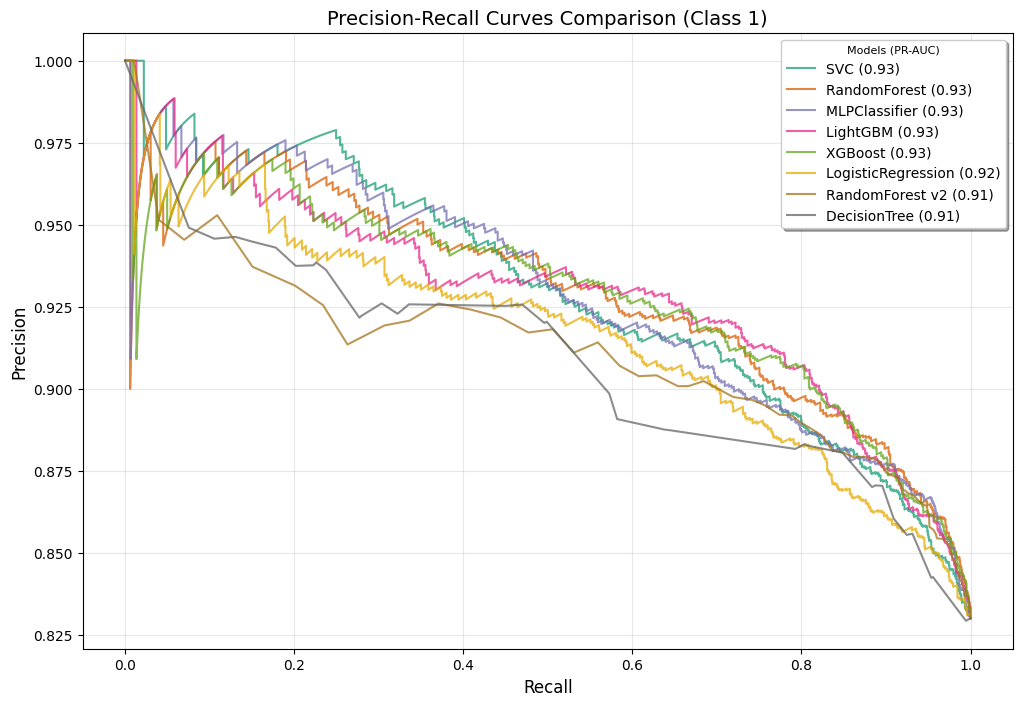

In [211]:
plt.figure(figsize=(12, 8))

# Список моделей и их предсказанных вероятностей
models = [
    ("LogisticRegression", best_lr.predict_proba(X_test)[:, 1]),
    ("DecisionTree", best_dt.predict_proba(X_test)[:, 1]),
    ("RandomForest", best_rf.predict_proba(X_test)[:, 1]),
    ("XGBoost", best_xgb.predict_proba(X_test)[:, 1]),
    ("LightGBM", best_lgb.predict_proba(X_test)[:, 1]),
    ("SVC", best_svc.predict_proba(X_test)[:, 1]),
    ("RandomForest v2", clf_1.predict_proba(X_test)[:, 1]),
    ("MLPClassifier", best_mlp.predict_proba(X_test)[:, 1])
]

colors = plt.cm.Dark2.colors

# Сначала вычислим все метрики
pr_results = []
for name, y_score in models:
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    pr_auc = auc(recall, precision)
    pr_results.append((name, y_score, precision, recall, pr_auc))

# Отсортируем по PR-AUC (от лучшего к худшему)
pr_results.sort(key=lambda x: x[4], reverse=True)

# Затем построим в порядке качества
for i, (name, _, precision, recall, pr_auc) in enumerate(pr_results):
    plt.plot(recall, precision, alpha=0.75, color=colors[i % len(colors)],
             label=f"{name} ({pr_auc:.2f})")

plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision-Recall Curves Comparison (Class 1)", fontsize=14)
plt.legend(
    loc="best",
    title="Models (PR-AUC)",
    title_fontsize=8,
    fontsize=10,
    frameon=True,
    shadow=True
)
plt.grid(True, alpha=0.3)

plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


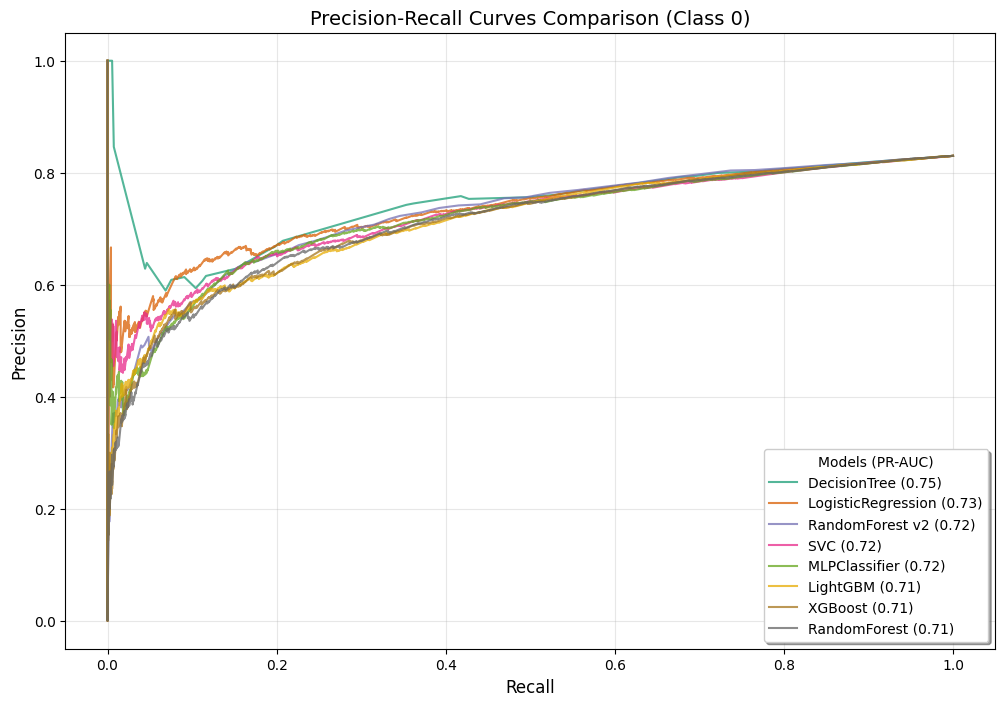

In [212]:
plt.figure(figsize=(12, 8))

# Список моделей и их предсказанных вероятностей
models = [
    ("LogisticRegression", best_lr.predict_proba(X_test)[:, 0]),
    ("DecisionTree", best_dt.predict_proba(X_test)[:, 0]),
    ("RandomForest", best_rf.predict_proba(X_test)[:, 0]),
    ("XGBoost", best_xgb.predict_proba(X_test)[:, 0]),
    ("LightGBM", best_lgb.predict_proba(X_test)[:, 0]),
    ("SVC", best_svc.predict_proba(X_test)[:, 0]),
    ("RandomForest v2", clf_1.predict_proba(X_test)[:, 0]),
    ("MLPClassifier", best_mlp.predict_proba(X_test)[:, 0])
]

colors = plt.cm.Dark2.colors

# Сначала вычислим все метрики
pr_results = []
for name, y_score in models:
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    pr_auc = auc(recall, precision)
    pr_results.append((name, y_score, precision, recall, pr_auc))

# Отсортируем по PR-AUC (от лучшего к худшему)
pr_results.sort(key=lambda x: x[4], reverse=True)

# Затем построим в порядке качества
for i, (name, _, precision, recall, pr_auc) in enumerate(pr_results):
    plt.plot(recall, precision, alpha=0.75, color=colors[i % len(colors)],
             label=f"{name} ({pr_auc:.2f})")

plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision-Recall Curves Comparison (Class 0)", fontsize=14)
plt.legend(
    loc="best",
    title="Models (PR-AUC)",
    title_fontsize=10,
    fontsize=10,
    frameon=True,
    shadow=True
)
plt.grid(True, alpha=0.3)

plt.show()